In [1]:
import os
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import 

In [2]:
path =  "~/Payne_Lab/SingleCellBenchMark/data/msgfplus/Ex_Auto_DrM3_30umT4_2ngQC_60m_half.tsv.gz"
msg_df =  pd.read_csv(path, sep = "\t")

In [3]:
msg_df

,#SpecFile,SpecID,ScanNum,FragMethod,Precursor,IsotopeError,PrecursorError(ppm),Charge,Peptide,Protein,DeNovoScore,MSGFScore,SpecEValue,EValue,QValue,PepQValue
0,Ex_Auto_DrM3_30umT4_2ngQC_60m_half.mzML,controllerType=0 controllerNumber=1 scan=19653,19653,HCD,1095.45940,0,2.785833,2,NMGGPYGGGNYGPGGSGGSGGYGGR,"sp|P22626|ROA2_HUMAN(pre=R,post=S)",316,312,6.192867e-32,1.365737e-24,0.000000,0.000000
1,Ex_Auto_DrM3_30umT4_2ngQC_60m_half.mzML,controllerType=0 controllerNumber=1 scan=21514,21514,HCD,929.07600,0,1.116807,3,EGIC+57.021ALGGTSELSSEGTQHSYSEEEK,"sp|P13797|PLST_HUMAN(pre=K,post=Y)",223,223,1.003438e-30,2.214772e-23,0.000000,0.000000
2,Ex_Auto_DrM3_30umT4_2ngQC_60m_half.mzML,controllerType=0 controllerNumber=1 scan=41561,41561,HCD,1379.73780,0,2.211844,2,SNYLLNTTIAGVEEADVVLLVGTNPR,"sp|P28331|NDUS1_HUMAN(pre=R,post=F)",281,276,5.478810e-30,1.209274e-22,0.000000,0.000000
3,Ex_Auto_DrM3_30umT4_2ngQC_60m_half.mzML,controllerType=0 controllerNumber=1 scan=17561,17561,HCD,921.80240,0,4.767347,3,AQGPAASAEEPKPVEAPAANSDQTVTVK,"sp|P80723|BASP1_HUMAN(pre=K,post=E)",199,196,1.565620e-29,3.460831e-22,0.000000,0.000000
4,Ex_Auto_DrM3_30umT4_2ngQC_60m_half.mzML,controllerType=0 controllerNumber=1 scan=28096,28096,HCD,689.08954,0,2.834364,4,LNC+57.021QVIGASVDSHFC+57.021HLAWVNTPK,"sp|Q06830|PRDX1_HUMAN(pre=K,post=K)",254,246,4.857852e-29,1.070362e-21,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35788,Ex_Auto_DrM3_30umT4_2ngQC_60m_half.mzML,controllerType=0 controllerNumber=1 scan=42854,42854,HCD,384.13535,1,-9.304376,2,DGSGGGGEM,"XXX_sp|Q5SRD1|TI23B_HUMAN(pre=K,post=-)",1,-85,2.153168e-02,4.572388e+05,0.479817,0.484493
35789,Ex_Auto_DrM3_30umT4_2ngQC_60m_half.mzML,controllerType=0 controllerNumber=1 scan=10967,10967,HCD,378.66696,1,12.188486,2,SPGGGPHM+15.995,"XXX_sp|Q86VX9|MON1A_HUMAN(pre=R,post=-)",52,-92,2.320015e-02,4.887714e+05,0.479855,0.484448
35790,Ex_Auto_DrM3_30umT4_2ngQC_60m_half.mzML,controllerType=0 controllerNumber=1 scan=41999,41999,HCD,383.13147,-1,-10.662175,2,DGSGGGGEM,"XXX_sp|Q5SRD1|TI23B_HUMAN(pre=K,post=-)",0,-93,2.547064e-02,5.408852e+05,0.479893,0.484493
35791,Ex_Auto_DrM3_30umT4_2ngQC_60m_half.mzML,controllerType=0 controllerNumber=1 scan=43501,43501,HCD,386.65695,-1,-18.920235,2,APGNSPC+57.021A,"sp|Q68DC2|ANKS6_HUMAN(pre=R,post=-)",12,-93,2.688617e-02,5.664269e+05,0.479913,0.484493


In [4]:
#check that this is right
def make_decoy_col_msgf(row):
    if row["Protein"].startswith("XXX_"):
        return False
    else:
        return True

In [5]:
msg_df["target_column"] = msg_df.apply(make_decoy_col_msgf, axis = 1)

In [54]:
msg_df

,ScanNum,Precursor,IsotopeError,PrecursorError(ppm),Charge,Peptide,DeNovoScore,MSGFScore,SpecEValue,EValue,QValue,PepQValue,target_column
0,19653,1095.45940,0,2.785833,2,NMGGPYGGGNYGPGGSGGSGGYGGR,316,312,6.192867e-32,1.365737e-24,0.000000,0.000000,True
1,21514,929.07600,0,1.116807,3,EGIC+57.021ALGGTSELSSEGTQHSYSEEEK,223,223,1.003438e-30,2.214772e-23,0.000000,0.000000,True
2,41561,1379.73780,0,2.211844,2,SNYLLNTTIAGVEEADVVLLVGTNPR,281,276,5.478810e-30,1.209274e-22,0.000000,0.000000,True
3,17561,921.80240,0,4.767347,3,AQGPAASAEEPKPVEAPAANSDQTVTVK,199,196,1.565620e-29,3.460831e-22,0.000000,0.000000,True
4,28096,689.08954,0,2.834364,4,LNC+57.021QVIGASVDSHFC+57.021HLAWVNTPK,254,246,4.857852e-29,1.070362e-21,0.000000,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35788,42854,384.13535,1,-9.304376,2,DGSGGGGEM,1,-85,2.153168e-02,4.572388e+05,0.479817,0.484493,False
35789,10967,378.66696,1,12.188486,2,SPGGGPHM+15.995,52,-92,2.320015e-02,4.887714e+05,0.479855,0.484448,False
35790,41999,383.13147,-1,-10.662175,2,DGSGGGGEM,0,-93,2.547064e-02,5.408852e+05,0.479893,0.484493,False
35791,43501,386.65695,-1,-18.920235,2,APGNSPC+57.021A,12,-93,2.688617e-02,5.664269e+05,0.479913,0.484493,True


In [59]:
len(msg_df[msg_df['QValue'] <= 0.01])

12184

In [7]:
msg_df = msg_df.drop(columns = {'Protein', 'SpecID', 'FragMethod', 
                                 '#SpecFile'})
msg_df.columns

Index(['ScanNum', 'Precursor', 'IsotopeError', 'PrecursorError(ppm)', 'Charge',
       'Peptide', 'DeNovoScore', 'MSGFScore', 'SpecEValue', 'EValue', 'QValue',
       'PepQValue', 'target_column'],
      dtype='object')

In [8]:
msg_for_MP = mokapot.dataset.LinearPsmDataset(msg_df, target_column = "target_column", spectrum_columns = "ScanNum", 
                                             peptide_column = "Peptide", protein_column=None, 
                                             group_column=None, feature_columns=None, copy_data=True)

In [17]:
results, models = mokapot.brew(msg_for_MP)
#results.to_txt()

In [19]:
results

A mokapot.confidence.LinearConfidence object:
	- PSMs at q<=0.01: 12317
	- Peptides at q<=0.01: 10691

In [20]:
results.psms

,ScanNum,Peptide,target_column,mokapot score,mokapot q-value,mokapot PEP
0,29232,VVIIGAGK,True,0.194166,0.000389,0.001737
1,41561,SNYLLNTTIAGVEEADVVLLVGTNPR,True,0.157949,0.000389,0.003539
2,27040,ELQSQISDTSVVLSMDNSR,True,0.148767,0.000389,0.004239
3,40019,VQDDEVGDGTTSVTVLAAELLR,True,0.148567,0.000389,0.004256
4,43072,VALTGLTVAEYFRDQEGQDVLLFIDNIFR,True,0.145834,0.000389,0.004491
...,...,...,...,...,...,...
32635,40444,IPKPAGVK,True,-1.558828,0.415272,1.000000
32636,2766,VM+15.995DSDEDDDY,True,-1.559342,0.415272,1.000000
32637,44838,DPNC+57.021SC+57.021ATGGSC+57.021SC+57.021ASSC...,True,-1.559618,0.415272,1.000000
32641,6231,C+57.021EFEGC+57.021ER,True,-1.562070,0.415384,1.000000


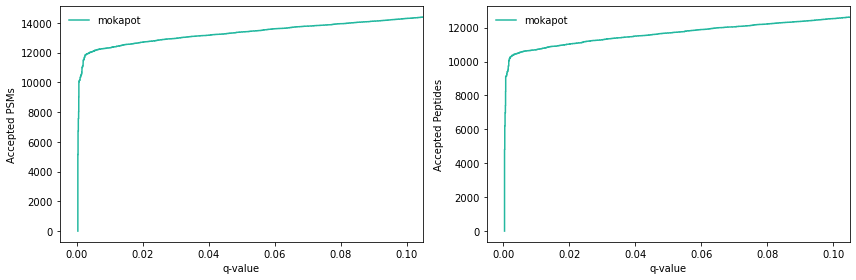

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
colors = ("#343131", "#24B8A0")

# Plot the performance:
for ax, level in zip(axs, results.levels):
    results.plot_qvalues(level=level, c=colors[1], ax=ax,
                           label="mokapot")
    ax.legend(frameon=False)

plt.tight_layout()
plt.show()

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

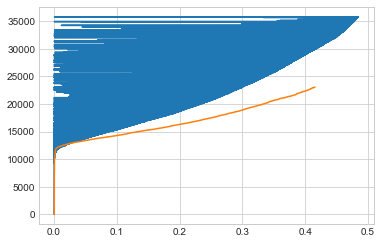

In [53]:
fig = plt.figure()
ax = plt.axes()
plt.plot(msg_df['PepQValue'], range(len(msg_df["PepQValue"])))
plt.plot(results.psms['mokapot q-value'], range(len(results.psms['mokapot q-value'])))